In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical

from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(11)



In [106]:
SEED = 123 #used to help randomly select the data points
DATA_SPLIT_PCT = 0.2

rcParams['figure.figsize'] = 8, 6
LABELS = ["Normal","Break"]

In [107]:
# load  dataset
df = pd.read_csv('/home/francovm/Projects/SSE/data/processed/input_data_shifted.csv', sep='\t', encoding='utf-8', index_col=0)


In [108]:
input_X = df.loc[:, df.columns != 'Events'].values  # converts the df to a numpy array
input_y = df['Events'].values

n_features = input_X.shape[1]  # number of features

print(input_X.shape,input_y.shape)

(219861, 3) (219861,)


In [109]:
def temporalize(X, y, lookback):
    X = []
    y = []
    for i in range(len(input_X)-lookback-1):
        t = []
        for j in range(1,lookback+1):
            # Gather past records upto the lookback period
            t.append(input_X[[(i+j+1)], :])
        X.append(t)
        y.append(input_y[i+lookback+1])
    return X, y


In [110]:
# Temporalize the data
lookback = 20
X, y = temporalize(X = input_X, y = input_y, lookback = lookback)



In [111]:
#Split into Test, valid and train

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=DATA_SPLIT_PCT, random_state=SEED)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=DATA_SPLIT_PCT, random_state=SEED)

In [112]:
# Reshape the arrays

X_train = X_train.reshape(X_train.shape[0], lookback, n_features)
# X_train_y0 = X_train_y0.reshape(X_train_y0.shape[0], lookback, n_features)
# X_train_y1 = X_train_y1.reshape(X_train_y1.shape[0], lookback, n_features)
X_valid = X_valid.reshape(X_valid.shape[0], lookback, n_features)
# X_valid_y0 = X_valid_y0.reshape(X_valid_y0.shape[0], lookback, n_features)
# X_valid_y1 = X_valid_y1.reshape(X_valid_y1.shape[0], lookback, n_features)b
X_test = X_test.reshape(X_test.shape[0], lookback, n_features)

In [113]:
y_train.shape

(140697,)

In [114]:
## To Categorical Data

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# y_valid = to_categorical(y_valid)

# print(y_valid.shape, y_test.shape, y_train.shape)

In [115]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], 1
print(n_timesteps,n_features,n_outputs)

20 3 1


In [116]:
def flatten(X):
    '''
    Flatten a 3D array.
    
    Input
    X            A 3D array for lstm, where the array is sample x timesteps x features.
    
    Output
    flattened_X  A 2D array, sample x features.
    '''
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

def scale(X, scaler):
    '''
    Scale 3D array.

    Inputs
    X            A 3D array for lstm, where the array is sample x timesteps x features.
    scaler       A scaler object, e.g., sklearn.preprocessing.StandardScaler, sklearn.preprocessing.normalize
    
    Output
    X            Scaled 3D array.
    '''
    for i in range(X.shape[0]):
        X[i, :, :] = scaler.transform(X[i, :, :])
        
    return X

### Stardarization

In [117]:
# Initialize a scaler using the training data.
# scaler = StandardScaler().fit(flatten(X_train))

In [118]:
# Standarize the input

# X_train_scaled = scale(X_train, scaler)
# X_valid_scaled = scale(X_valid, scaler)
# X_test_scaled = scale(X_test, scaler)

### Test Standarization

In [119]:
# a = flatten(X_train_scaled)
# print('colwise mean', np.mean(a,axis=0).round(6))
# print('colwise variance', np.var(a, axis=0))



# Test acurracy

Not use for now

In [120]:
# fit and evaluate a model
def evaluate_model(X_train, y_train, X_test, y_test):
    
    verbose, epochs, batch_size = 1, 15, 64
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
#     model.add(Dense(n_outputs, activation='softmax'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit network
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size ,validation_data=(X_valid, y_valid),verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
    
    return accuracy

In [121]:
# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = np.mean(scores), np.std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))


In [122]:
# run an experiment
def run_experiment(repeats=2):
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)
 
    # run the experiment
# run_experiment()

# Model training

Training models (Use it)


In [123]:
# Parameters

verbose, epochs, batch_size = 1, 100, 64



model = Sequential()
model.add(LSTM(50, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
#     model.add(Dense(n_outputs, activation='softmax'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)

# fit network
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_valid, y_valid), verbose=verbose,
                    callbacks=[early_stopping_monitor])


# evaluate model
accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

Train on 140697 samples, validate on 35175 samples
Epoch 1/100
140697/140697 [==============================] - 125s 886us/step - loss: 0.1276 - acc: 0.9714 - val_loss: 0.1107 - val_acc: 0.9761
Epoch 2/100
140697/140697 [==============================] - 122s 870us/step - loss: 0.1153 - acc: 0.9745 - val_loss: 0.1083 - val_acc: 0.9761
Epoch 3/100
140697/140697 [==============================] - 123s 876us/step - loss: 0.1133 - acc: 0.9745 - val_loss: 0.1084 - val_acc: 0.9761
Epoch 4/100
140697/140697 [==============================] - 123s 873us/step - loss: 0.1121 - acc: 0.9744 - val_loss: 0.1066 - val_acc: 0.9761
Epoch 5/100
140697/140697 [==============================] - 123s 875us/step - loss: 0.1111 - acc: 0.9745 - val_loss: 0.1050 - val_acc: 0.9762
Epoch 6/100
140697/140697 [==============================] - 123s 872us/step - loss: 0.1102 - acc: 0.9746 - val_loss: 0.1039 - val_acc: 0.9761
Epoch 7/100
140697/140697 [==============================] - 122s 864us/step - loss: 0.1092

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


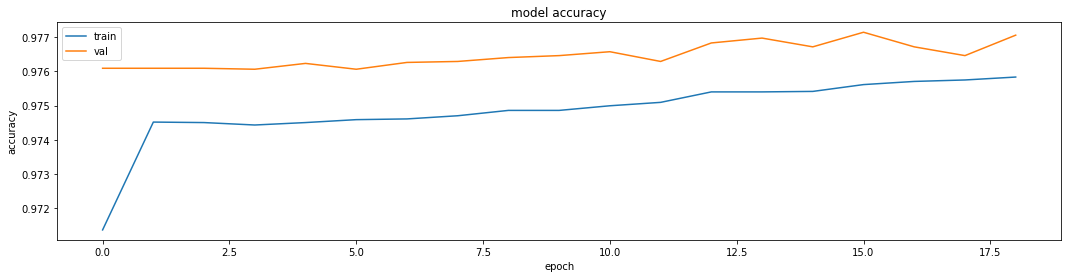

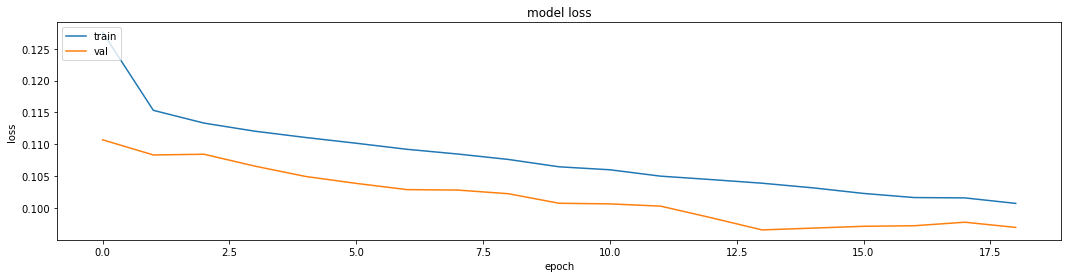

In [125]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
#  Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.savefig('/home/francovm/Projects/SSE/data/Visualization/LSTM-20days-acc-shifted.png')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
 # Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.savefig('/home/francovm/Projects/SSE/data/Visualization/LSTM-20days-loss-shifted.png')
plt.show()

In [126]:
# save model and architecture to single file
model.save("/home/francovm/Projects/SSE/models/Binary_clasifier/Binary_clasifier_LSTM_SSE_20days-shifted.h5")
# model.save("/home/francovm/Projects/SSE/models/Binary_clasifier/Binary_clasifier_LSTM_SSE_20days_standarize.h5")

In [91]:
# ynew = model.predict(X_test)

In [92]:
# ynew

In [93]:
# plt.plot(ynew) # plotting by columns
# plt.axhline(0.5)
# plt.show()